### Spotify uses a series of different features to classify tracks. I copy/paste the information from the Spotify Webpage.




- **Acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.


- **Danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.


- **Energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.


- **Instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.


- **Liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.


- **Loudness**: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing the relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.


- **Speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
    
    
- **Valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
    
    
- **Tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration.

***

### Using the cleanedDatasetWithFeatures

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as sm

# Other utilities
from sklearn import datasets, preprocessing, metrics

## Import the data

In [3]:
data = pd.read_csv("../data/cleanedDatasetWithFeatures.csv")

In [4]:
data.shape

(104561, 20)

In [5]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'title', 'rank', 'date', 'artist', 'url',
       'region', 'streams', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [6]:
# See attribute labels
list(data)

['Unnamed: 0.1',
 'Unnamed: 0',
 'title',
 'rank',
 'date',
 'artist',
 'url',
 'region',
 'streams',
 'danceability',
 'energy',
 'key',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

In [7]:
data.drop('Unnamed: 0', inplace=True, axis=1)
data.drop('Unnamed: 0.1', inplace=True, axis=1)

In [8]:
data.head()

,title,rank,date,artist,url,region,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,253019.0,0.852,0.773,8.0,-2.921,0.0776,0.187,0.000030,0.1590,0.9070,102.034,195840.0
1,Despacito (Featuring Daddy Yankee),1,2017-04-07,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Dominican Republic,11681.0,0.660,0.786,2.0,-4.757,0.1700,0.209,0.000000,0.1120,0.8460,177.833,228200.0
2,ภาพจำ,1,2018-04-12,Pop Pongkool,https://open.spotify.com/track/4YRpjJaJpiI36HM...,Thailand,15477.0,0.557,0.585,5.0,-7.559,0.0470,0.426,0.000001,0.1440,0.4640,81.922,274000.0
3,Te Boté - Remix,1,2018-04-27,"Nio Garcia, Casper Magico, Bad Bunny, Darell, ...",https://open.spotify.com/track/3V8UKqhEK5zBkBb...,Honduras,12869.0,0.903,0.675,11.0,-3.445,0.2140,0.542,0.000013,0.0595,0.4420,96.507,417920.0
4,Binibini,1,2021-04-16,Zack Tabudlo,https://open.spotify.com/track/2X5AFygz5SDYlXa...,Philippines,401678.0,0.642,0.374,5.0,-10.606,0.0320,0.423,0.000002,0.4350,0.0979,129.863,221538.0


In [9]:
data.tail()

,title,rank,date,artist,url,region,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
104556,Coraz bliżej Święta,200,2018-11-23,Nosowska,https://open.spotify.com/track/2K6hdg6MKfKrDQB...,Poland,9718.0,0.639,0.727,5.0,-6.985,0.0587,0.0939,0.013200,0.0929,0.447,146.081,205687.0
104557,Ik Heb Je,200,2018-10-26,Maan,https://open.spotify.com/track/2Xqs5ozueApOYZm...,Netherlands,25204.0,0.845,0.559,6.0,-5.171,0.1680,0.3370,0.001710,0.0758,0.628,100.242,176404.0
104558,המנון הלוחם,200,2021-04-23,Hatikva 6,https://open.spotify.com/track/2i1xX8VmwMDtmF7...,Israel,3822.0,0.648,0.668,1.0,-10.186,0.0879,0.0722,0.000000,0.1300,0.848,134.058,195376.0
104559,ครางชื่ออ้ายแน,200,2018-10-27,ศรีจันทร์ วีสี,https://open.spotify.com/track/5ZwxJQ8vR5cHWer...,Thailand,2390.0,0.488,0.687,0.0,-8.530,0.0503,0.1540,0.000001,0.1330,0.553,153.052,215427.0
104560,好久不見的你,200,2017-02-05,施易男,https://open.spotify.com/track/3YRYLUJBuB1epfI...,Taiwan,2005.0,0.382,0.258,4.0,-14.364,0.0349,0.7120,0.000000,0.0993,0.300,137.763,250582.0


# Cleaning data

**Changing "duration_ms" values from milliseconds to minutes**

In [32]:
import time
tic = time.perf_counter()

errors = 0

for index, row in data.iterrows():
    try:
        
        #data.at[index,'danceability'] = float(current['danceability'])
        data.at[index,'duration_m'] = float(int((row['duration_ms']/1000)/60)+(int((row['duration_ms']/1000)%60))/100)
        
        print(str(int(((index+1)/data.shape[0])*100)) + '% done - ' + str(index+1) + ' of ' + str(data.shape[0]) + ' songs iterated - ' + errors + ' encountered.', end='\r')
    except:
        #append error or insert specific values?
        errors = errors+1
        pass
    
        
toc = time.perf_counter()
print(f"Added new rows from external links in {toc - tic:0.4f} seconds")

Added new rows from external links in 4.8411 seconds


In [10]:
data.dtypes

title                object
rank                  int64
date                 object
artist               object
url                  object
region               object
streams             float64
danceability        float64
energy              float64
key                 float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
dtype: object

In [11]:
data.head()

,title,rank,date,artist,url,region,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,253019.0,0.852,0.773,8.0,-2.921,0.0776,0.187,0.000030,0.1590,0.9070,102.034,195840.0
1,Despacito (Featuring Daddy Yankee),1,2017-04-07,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Dominican Republic,11681.0,0.660,0.786,2.0,-4.757,0.1700,0.209,0.000000,0.1120,0.8460,177.833,228200.0
2,ภาพจำ,1,2018-04-12,Pop Pongkool,https://open.spotify.com/track/4YRpjJaJpiI36HM...,Thailand,15477.0,0.557,0.585,5.0,-7.559,0.0470,0.426,0.000001,0.1440,0.4640,81.922,274000.0
3,Te Boté - Remix,1,2018-04-27,"Nio Garcia, Casper Magico, Bad Bunny, Darell, ...",https://open.spotify.com/track/3V8UKqhEK5zBkBb...,Honduras,12869.0,0.903,0.675,11.0,-3.445,0.2140,0.542,0.000013,0.0595,0.4420,96.507,417920.0
4,Binibini,1,2021-04-16,Zack Tabudlo,https://open.spotify.com/track/2X5AFygz5SDYlXa...,Philippines,401678.0,0.642,0.374,5.0,-10.606,0.0320,0.423,0.000002,0.4350,0.0979,129.863,221538.0


In [12]:
data.tail()

,title,rank,date,artist,url,region,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
104556,Coraz bliżej Święta,200,2018-11-23,Nosowska,https://open.spotify.com/track/2K6hdg6MKfKrDQB...,Poland,9718.0,0.639,0.727,5.0,-6.985,0.0587,0.0939,0.013200,0.0929,0.447,146.081,205687.0
104557,Ik Heb Je,200,2018-10-26,Maan,https://open.spotify.com/track/2Xqs5ozueApOYZm...,Netherlands,25204.0,0.845,0.559,6.0,-5.171,0.1680,0.3370,0.001710,0.0758,0.628,100.242,176404.0
104558,המנון הלוחם,200,2021-04-23,Hatikva 6,https://open.spotify.com/track/2i1xX8VmwMDtmF7...,Israel,3822.0,0.648,0.668,1.0,-10.186,0.0879,0.0722,0.000000,0.1300,0.848,134.058,195376.0
104559,ครางชื่ออ้ายแน,200,2018-10-27,ศรีจันทร์ วีสี,https://open.spotify.com/track/5ZwxJQ8vR5cHWer...,Thailand,2390.0,0.488,0.687,0.0,-8.530,0.0503,0.1540,0.000001,0.1330,0.553,153.052,215427.0
104560,好久不見的你,200,2017-02-05,施易男,https://open.spotify.com/track/3YRYLUJBuB1epfI...,Taiwan,2005.0,0.382,0.258,4.0,-14.364,0.0349,0.7120,0.000000,0.0993,0.300,137.763,250582.0


**Now we can drop the column containing the milliseconds**

In [55]:
#data.drop('duration_ms', inplace=True, axis=1)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104561 entries, 0 to 104560
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   title             104561 non-null  object 
 1   rank              104561 non-null  int64  
 2   date              104561 non-null  object 
 3   artist            104561 non-null  object 
 4   url               104561 non-null  object 
 5   region            104561 non-null  object 
 6   streams           104561 non-null  float64
 7   danceability      104544 non-null  float64
 8   energy            104544 non-null  float64
 9   key               104544 non-null  float64
 10  loudness          104544 non-null  float64
 11  speechiness       104544 non-null  float64
 12  acousticness      104544 non-null  float64
 13  instrumentalness  104544 non-null  float64
 14  liveness          104544 non-null  float64
 15  valence           104544 non-null  float64
 16  tempo             10

## Creating a popularity

**We are building the popularity on the amount of streams each song has. We are doing this based on the quantiles of the column "streams" in our dataset.**

**We are ranking the popularity from 1 - 5, where a song with the popularity of one is the lowest in popularity and a song with the popularity of 5 is most popular.**

In [13]:
quantiles = data["streams"].quantile([0, 0.2, 0.4, 0.6, 0.8, 1])
quantiles

0.0       1001.0
0.2       3944.0
0.4      11936.0
0.6      32783.0
0.8      79883.0
1.0    8611591.0
Name: streams, dtype: float64

In [39]:
quantiles[0.2]

3944.0

In [40]:
import time
tic = time.perf_counter()
counter = 0

for index, row in data.iterrows():
  
    if (row["streams"] <= quantiles[0.2]):
        data.at[index, 'popularity'] = int(1)

    elif (row["streams"] <= quantiles[0.4]) & (row["streams"] > quantiles[0.2]):
        data.at[index, 'popularity'] = int(2)

    elif (row["streams"] <= quantiles[0.6]) & (row["streams"] > quantiles[0.4]):
        data.at[index, 'popularity'] = int(3)

    elif (row["streams"] <= quantiles[0.8]) & (row["streams"] > quantiles[0.6]):
        data.at[index, 'popularity'] = int(4)

    elif (row["streams"] > quantiles[0.8]):
        data.at[index, 'popularity'] = int(5)
       
    # print(str(int(((counter)/data.shape[0])*100)) + '% done - ' + str(counter) + ' of ' + str(data.shape[0]) + ' songs iterated.', end='\r')
    counter = counter+1
                
toc = time.perf_counter()
print(f"Added new rows from external links in {toc - tic:0.4f} seconds")

Added new rows from external links in 6.2117 seconds


In [42]:
data['popularity'] = data['popularity'].astype(int)

# Looking at the data

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

<AxesSubplot:xlabel='tempo', ylabel='Density'>

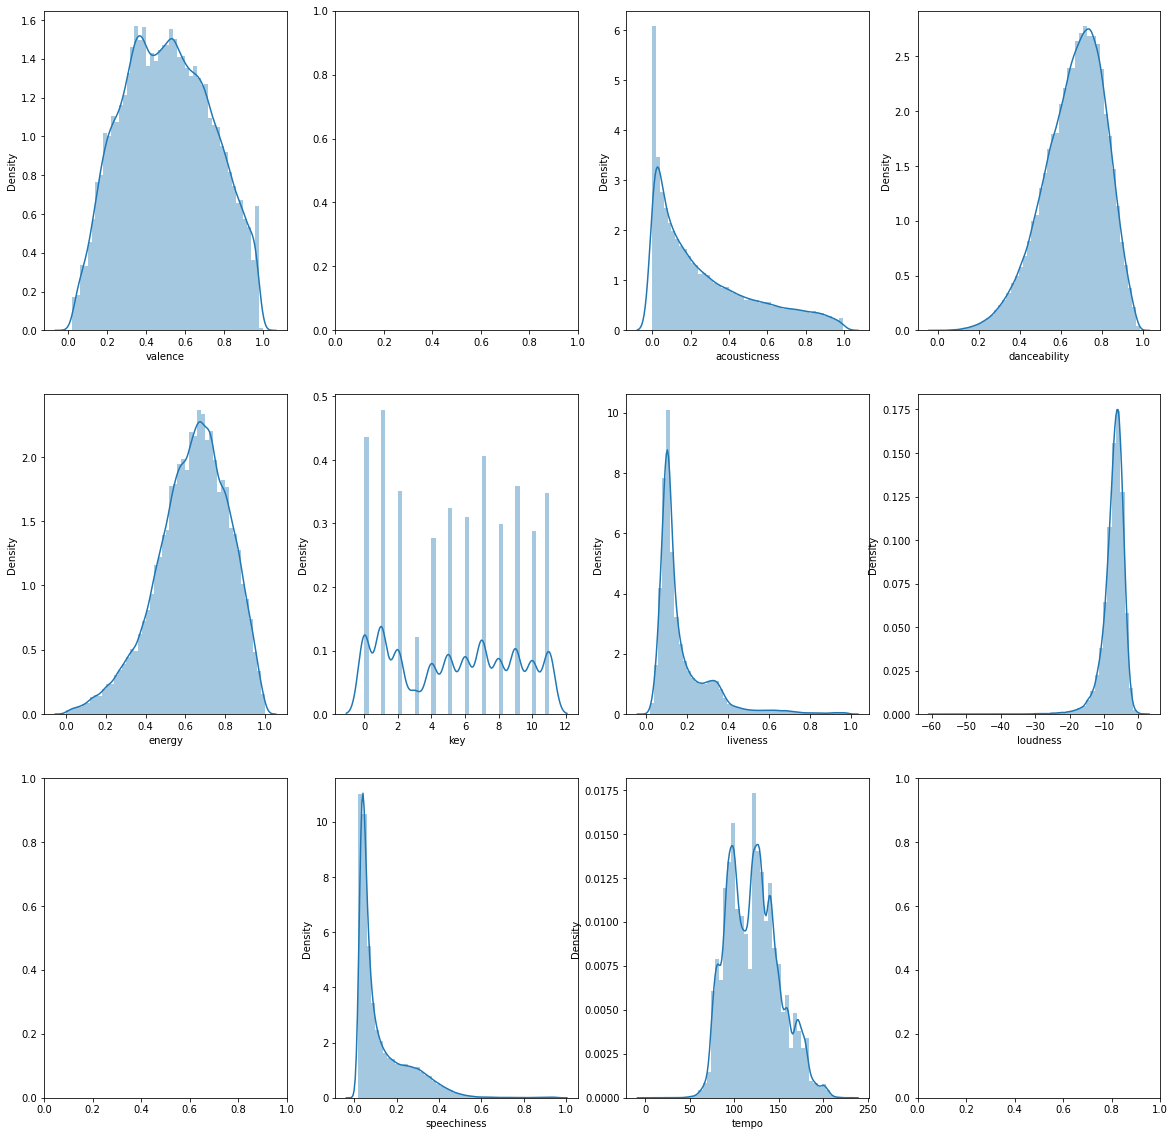

In [14]:
#Visualisation of Variability for each column in the dataframe
fig,ax = plt.subplots(3,4,figsize=(20,20))

sns.distplot(data['valence'],ax=ax[0,0])
sns.distplot(data['acousticness'],ax=ax[0,2])
sns.distplot(data['danceability'],ax=ax[0,3])
#sns.distplot(data['duration_m'],ax=ax[1,1])
sns.distplot(data['energy'],ax=ax[1,0])
sns.distplot(data['key'],ax=ax[1,1])
sns.distplot(data['liveness'],ax=ax[1,2])
sns.distplot(data['loudness'],ax=ax[1,3])
#sns.distplot(data['popularity'],ax=ax[2,0])
sns.distplot(data['speechiness'],ax=ax[2,1])
sns.distplot(data['tempo'],ax=ax[2,2])

<AxesSubplot:>

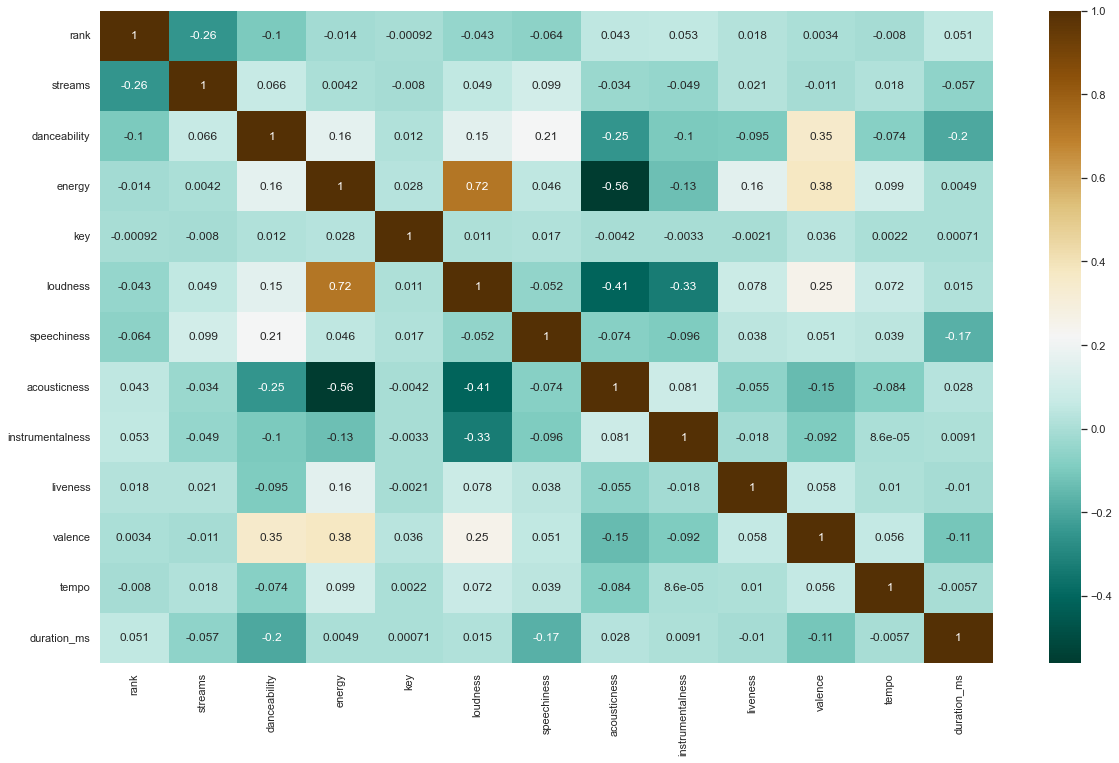

In [15]:
plt.figure(figsize=(20,12))
sns.set(style="whitegrid")
corr = data.corr()
sns.heatmap(corr,annot=True, cmap='BrBG_r', annot_kws={"fontsize":12}) # cmap='BrBG_r',

## Getting the most streamed songs

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Streams')

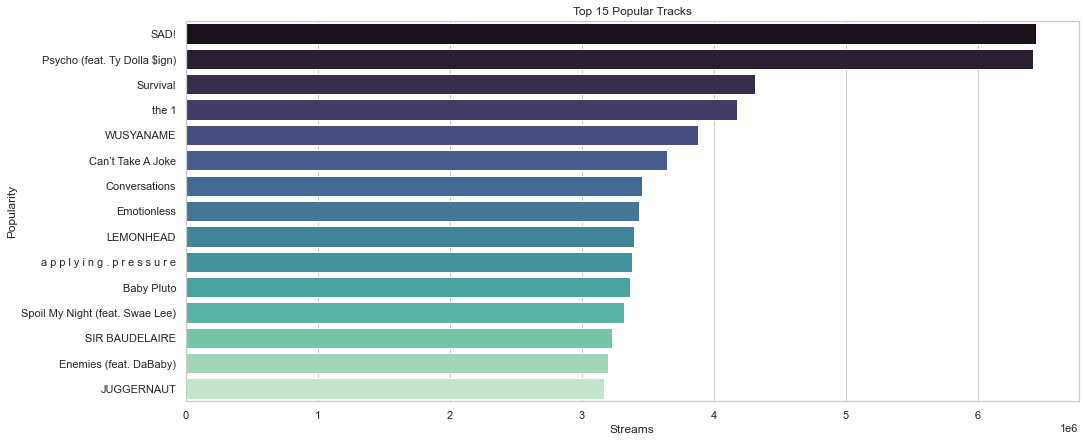

In [16]:
#Most Popular Tracks
fig, axis = plt.subplots(figsize = (16,7))
popular = data.groupby("title")['streams'].mean().sort_values(ascending = False).head(15)
axis = sns.barplot(popular,popular.index,palette="mako",orient = 'h')
axis.set_title('Top 15 Popular Tracks')
axis.set_ylabel('Popularity')
axis.set_xlabel('Streams')

In [17]:
data.groupby("title")['streams'].mean().sort_values(ascending=False).head(15)

title
SAD!                                 6439012.0
Psycho (feat. Ty Dolla $ign)         6418506.0
Survival                             4307288.0
the 1                                4175284.0
WUSYANAME                            3876167.0
Can’t Take A Joke                    3642782.0
Conversations                        3452709.0
Emotionless                          3433745.0
LEMONHEAD                            3397137.0
a p p l y i n g . p r e s s u r e    3380786.0
Baby Pluto                           3364245.0
Spoil My Night (feat. Swae Lee)      3318588.0
SIR BAUDELAIRE                       3228838.0
Enemies (feat. DaBaby)               3198197.0
JUGGERNAUT                           3166477.0
Name: streams, dtype: float64

## Getting the most streamed artists

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Streams')

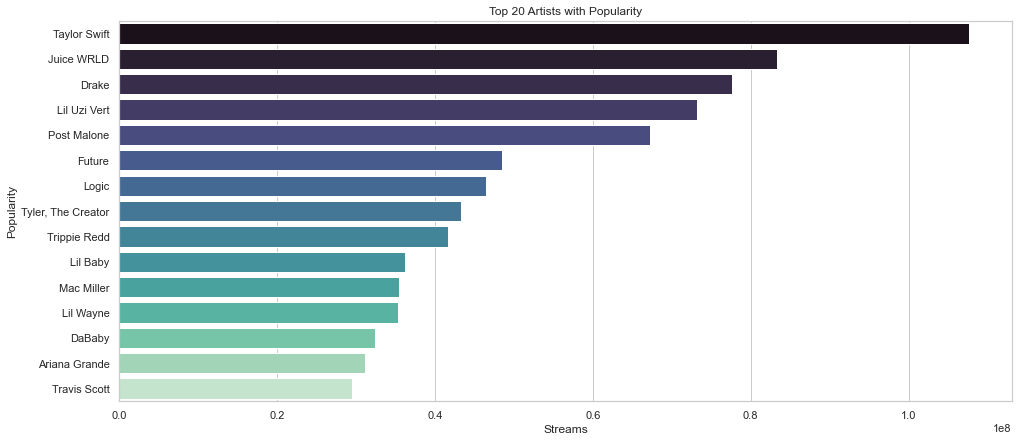

In [18]:
fig, axis = plt.subplots(figsize = (16,7))
popular = data.groupby("artist")['streams'].sum().sort_values(ascending = False).head(15)
axis = sns.barplot(popular, popular.index, palette="mako", orient='h')
axis.set_title('Top 20 Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Streams')

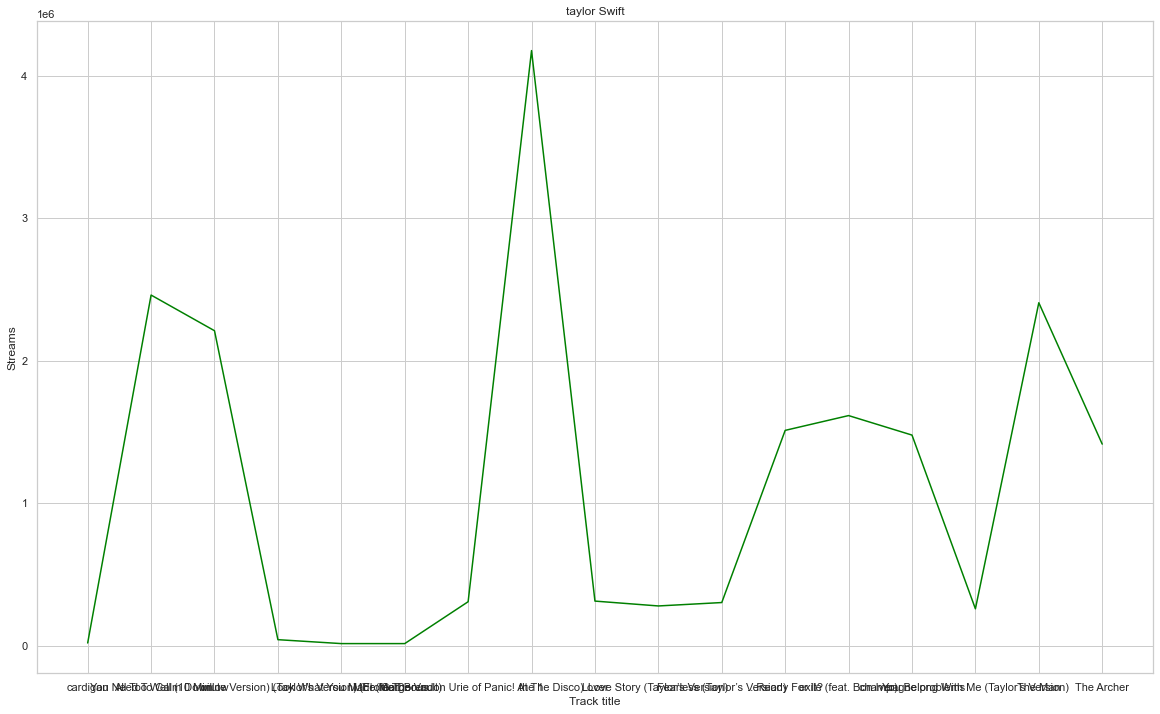

In [19]:
# visualizing the popularity of taylor Swift by her songs
taylor = data[data['artist'] == 'Taylor Swift'].head(17)
plt.rcParams['figure.figsize'] = (20,12)

sns.lineplot(x='title', y='streams', data=taylor, color='green')
# Labels
plt.title("taylor Swift")
plt.xlabel('Track title')
plt.ylabel('Streams')
plt.show()

## Trying to predict where it will end up on a ranking

In [20]:
#Libraries to pre-process the variables
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

In [70]:
df = pd.read_csv("https://raw.githubusercontent.com/cristobalvch/Spotify-Machine-Learning/master/data/data_moods.csv")

In [57]:
df.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


# Predicting the mood with neural network training

In [24]:
#Libraries to create the Multi-class Neural Network

!pip install tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

#Import tensorflow and disable the v2 behavior and eager mode
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


Instructions for updating:
non-resource variables are not supported in the long term


In [71]:
#Define the features and the target
col_features = df.columns[6:-3]

X = df[col_features]
Y = df['mood']

#Normalize the features
X= MinMaxScaler().fit_transform(X)

#Encode the labels (targets)
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)

#Split train and test data with a test size of 20%
X_train,X_test,Y_train,Y_test = train_test_split(X,encoded_y,test_size=0.2,random_state=15) 


A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

***

A Sequential model is not appropriate when:

    - Your model has multiple inputs or multiple outputs
    - Any of your layers has multiple inputs or multiple outputs
    - You need to do layer sharing
    - You want non-linear topology (e.g. a residual connection, a multi-branch model)


**Creating "target" to assign int values to the mood categories**

In [72]:
target = pd.DataFrame({'mood':df['mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

,mood,encode
5,Calm,0
4,Energetic,1
0,Happy,2
1,Sad,3


In [74]:
# Creating a function that will create the structure of the Neural Network

def base():
    #The model
    model = Sequential()
    
    # Adding 8 nodes in the 1. layer, the input of 4 dimentions with a relu function
    model.add(Dense(8, input_dim=10, activation='relu'))
    
    #Add a layer with 3 outputs and a softmax function
    model.add(Dense(4, activation='softmax'))
    
    #Compile our model with a loss function and (adam) optimizer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#Configure the estimator with 300 epochs and 200 batchs. the build_fn takes the function defined above.

estimator= KerasClassifier(build_fn=base, epochs=300, batch_size=200) #-> Gives an accuracy of 81%
# estimator= KerasClassifier(build_fn=base, epochs=400, batch_size=200) -> Gives an accuracy of 79.7%
#estimator= KerasClassifier(build_fn=base, epochs=600, batch_size=400) -> Gives an accuracy of 80% 

C:\Users\Nmtur\AppData\Local\Temp\ipykernel_20004\4044691707.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator= KerasClassifier(build_fn=base, epochs=300, batch_size=200) #-> Gives an accuracy of 80%


https://www.baeldung.com/cs/epoch-neural-networks <- epochs explained

In [28]:
# library to evaluate the model
from sklearn.model_selection import cross_val_score, KFold

In [75]:
# Evaluate the model
kfold = KFold(n_splits=10, shuffle=True)
result = cross_val_score(estimator, X, encoded_y, cv=kfold)

print("%.2f%% (%.2f%%)" % (result.mean()*100,result.std()*100))

Train on 617 samples
Epoch 1/300
617/617 [==============================] - 0s 340us/sample - loss: 1.3809 - acc: 0.4603
Epoch 2/300
617/617 [==============================] - 0s 21us/sample - loss: 1.3719 - acc: 0.4700
Epoch 3/300
617/617 [==============================] - 0s 19us/sample - loss: 1.3642 - acc: 0.4733
Epoch 4/300
617/617 [==============================] - 0s 21us/sample - loss: 1.3565 - acc: 0.4781
Epoch 5/300
617/617 [==============================] - 0s 19us/sample - loss: 1.3490 - acc: 0.4814
Epoch 6/300
617/617 [==============================] - 0s 19us/sample - loss: 1.3417 - acc: 0.4862
Epoch 7/300
617/617 [==============================] - 0s 23us/sample - loss: 1.3344 - acc: 0.4878
Epoch 8/300
617/617 [==============================] - 0s 24us/sample - loss: 1.3272 - acc: 0.4814
Epoch 9/300
617/617 [==============================] - 0s 24us/sample - loss: 1.3200 - acc: 0.4814
Epoch 10/300
617/617 [==============================] - 0s 26us/sample - loss: 1.3132 -

617/617 [==============================] - 0s 31us/sample - loss: 0.8756 - acc: 0.6872
Epoch 83/300
617/617 [==============================] - 0s 31us/sample - loss: 0.8713 - acc: 0.6872
Epoch 84/300
617/617 [==============================] - 0s 32us/sample - loss: 0.8671 - acc: 0.6888
Epoch 85/300
617/617 [==============================] - 0s 29us/sample - loss: 0.8630 - acc: 0.6888
Epoch 86/300
617/617 [==============================] - 0s 29us/sample - loss: 0.8586 - acc: 0.6904
Epoch 87/300
617/617 [==============================] - 0s 30us/sample - loss: 0.8544 - acc: 0.6904
Epoch 88/300
617/617 [==============================] - 0s 29us/sample - loss: 0.8501 - acc: 0.6953
Epoch 89/300
617/617 [==============================] - 0s 29us/sample - loss: 0.8460 - acc: 0.6937
Epoch 90/300
617/617 [==============================] - 0s 29us/sample - loss: 0.8419 - acc: 0.6969
Epoch 91/300
617/617 [==============================] - 0s 30us/sample - loss: 0.8380 - acc: 0.6985
Epoch 92/300


617/617 [==============================] - 0s 31us/sample - loss: 0.6382 - acc: 0.7277
Epoch 164/300
617/617 [==============================] - 0s 29us/sample - loss: 0.6366 - acc: 0.7310
Epoch 165/300
617/617 [==============================] - 0s 30us/sample - loss: 0.6349 - acc: 0.7310
Epoch 166/300
617/617 [==============================] - 0s 29us/sample - loss: 0.6331 - acc: 0.7277
Epoch 167/300
617/617 [==============================] - 0s 29us/sample - loss: 0.6315 - acc: 0.7277
Epoch 168/300
617/617 [==============================] - 0s 29us/sample - loss: 0.6298 - acc: 0.7310
Epoch 169/300
617/617 [==============================] - 0s 28us/sample - loss: 0.6281 - acc: 0.7310
Epoch 170/300
617/617 [==============================] - 0s 29us/sample - loss: 0.6265 - acc: 0.7326
Epoch 171/300
617/617 [==============================] - 0s 29us/sample - loss: 0.6250 - acc: 0.7342
Epoch 172/300
617/617 [==============================] - 0s 29us/sample - loss: 0.6234 - acc: 0.7326
Epoc

617/617 [==============================] - 0s 28us/sample - loss: 0.5526 - acc: 0.7747
Epoch 245/300
617/617 [==============================] - 0s 31us/sample - loss: 0.5519 - acc: 0.7731
Epoch 246/300
617/617 [==============================] - 0s 27us/sample - loss: 0.5514 - acc: 0.7747
Epoch 247/300
617/617 [==============================] - 0s 27us/sample - loss: 0.5507 - acc: 0.7682
Epoch 248/300
617/617 [==============================] - 0s 29us/sample - loss: 0.5501 - acc: 0.7666
Epoch 249/300
617/617 [==============================] - 0s 28us/sample - loss: 0.5496 - acc: 0.7666
Epoch 250/300
617/617 [==============================] - 0s 27us/sample - loss: 0.5491 - acc: 0.7650
Epoch 251/300
617/617 [==============================] - 0s 26us/sample - loss: 0.5484 - acc: 0.7666
Epoch 252/300
617/617 [==============================] - 0s 29us/sample - loss: 0.5477 - acc: 0.7682
Epoch 253/300
617/617 [==============================] - 0s 28us/sample - loss: 0.5472 - acc: 0.7682
Epoc

C:\Python310\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 617 samples
Epoch 1/300
617/617 [==============================] - 0s 293us/sample - loss: 1.4505 - acc: 0.2139
Epoch 2/300
617/617 [==============================] - 0s 21us/sample - loss: 1.4436 - acc: 0.2188
Epoch 3/300
617/617 [==============================] - 0s 21us/sample - loss: 1.4370 - acc: 0.2188
Epoch 4/300
617/617 [==============================] - 0s 20us/sample - loss: 1.4308 - acc: 0.2188
Epoch 5/300
617/617 [==============================] - 0s 24us/sample - loss: 1.4248 - acc: 0.2172
Epoch 6/300
617/617 [==============================] - 0s 20us/sample - loss: 1.4188 - acc: 0.2237
Epoch 7/300
617/617 [==============================] - 0s 21us/sample - loss: 1.4132 - acc: 0.2301
Epoch 8/300
617/617 [==============================] - 0s 21us/sample - loss: 1.4076 - acc: 0.2301
Epoch 9/300
617/617 [==============================] - 0s 19us/sample - loss: 1.4023 - acc: 0.2269
Epoch 10/300
617/617 [==============================] - 0s 19us/sample - loss: 1.3975 -

617/617 [==============================] - 0s 26us/sample - loss: 1.1281 - acc: 0.7034
Epoch 83/300
617/617 [==============================] - 0s 28us/sample - loss: 1.1249 - acc: 0.7034
Epoch 84/300
617/617 [==============================] - 0s 21us/sample - loss: 1.1215 - acc: 0.7131
Epoch 85/300
617/617 [==============================] - 0s 20us/sample - loss: 1.1183 - acc: 0.7115
Epoch 86/300
617/617 [==============================] - 0s 21us/sample - loss: 1.1151 - acc: 0.7131
Epoch 87/300
617/617 [==============================] - 0s 19us/sample - loss: 1.1119 - acc: 0.7147
Epoch 88/300
617/617 [==============================] - 0s 21us/sample - loss: 1.1088 - acc: 0.7147
Epoch 89/300
617/617 [==============================] - 0s 19us/sample - loss: 1.1057 - acc: 0.7131
Epoch 90/300
617/617 [==============================] - 0s 20us/sample - loss: 1.1027 - acc: 0.7164
Epoch 91/300
617/617 [==============================] - 0s 19us/sample - loss: 1.0996 - acc: 0.7115
Epoch 92/300


617/617 [==============================] - 0s 31us/sample - loss: 0.9152 - acc: 0.7536
Epoch 164/300
617/617 [==============================] - 0s 29us/sample - loss: 0.9129 - acc: 0.7585
Epoch 165/300
617/617 [==============================] - 0s 32us/sample - loss: 0.9105 - acc: 0.7601
Epoch 166/300
617/617 [==============================] - 0s 30us/sample - loss: 0.9083 - acc: 0.7666
Epoch 167/300
617/617 [==============================] - 0s 32us/sample - loss: 0.9062 - acc: 0.7650
Epoch 168/300
617/617 [==============================] - 0s 30us/sample - loss: 0.9039 - acc: 0.7634
Epoch 169/300
617/617 [==============================] - 0s 31us/sample - loss: 0.9017 - acc: 0.7634
Epoch 170/300
617/617 [==============================] - 0s 32us/sample - loss: 0.8995 - acc: 0.7650
Epoch 171/300
617/617 [==============================] - 0s 31us/sample - loss: 0.8973 - acc: 0.7634
Epoch 172/300
617/617 [==============================] - 0s 29us/sample - loss: 0.8951 - acc: 0.7650
Epoc

617/617 [==============================] - 0s 19us/sample - loss: 0.7669 - acc: 0.7715
Epoch 245/300
617/617 [==============================] - 0s 20us/sample - loss: 0.7655 - acc: 0.7682
Epoch 246/300
617/617 [==============================] - 0s 23us/sample - loss: 0.7639 - acc: 0.7699
Epoch 247/300
617/617 [==============================] - 0s 21us/sample - loss: 0.7624 - acc: 0.7666
Epoch 248/300
617/617 [==============================] - 0s 21us/sample - loss: 0.7613 - acc: 0.7650
Epoch 249/300
617/617 [==============================] - 0s 24us/sample - loss: 0.7600 - acc: 0.7634
Epoch 250/300
617/617 [==============================] - 0s 24us/sample - loss: 0.7584 - acc: 0.7650
Epoch 251/300
617/617 [==============================] - 0s 24us/sample - loss: 0.7569 - acc: 0.7666
Epoch 252/300
617/617 [==============================] - 0s 26us/sample - loss: 0.7554 - acc: 0.7682
Epoch 253/300
617/617 [==============================] - 0s 24us/sample - loss: 0.7540 - acc: 0.7682
Epoc

C:\Python310\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 617 samples
Epoch 1/300
617/617 [==============================] - 0s 309us/sample - loss: 1.5365 - acc: 0.1961
Epoch 2/300
617/617 [==============================] - 0s 18us/sample - loss: 1.5222 - acc: 0.2058
Epoch 3/300
617/617 [==============================] - 0s 21us/sample - loss: 1.5089 - acc: 0.2058
Epoch 4/300
617/617 [==============================] - 0s 19us/sample - loss: 1.4960 - acc: 0.2042
Epoch 5/300
617/617 [==============================] - 0s 20us/sample - loss: 1.4841 - acc: 0.2010
Epoch 6/300
617/617 [==============================] - 0s 21us/sample - loss: 1.4729 - acc: 0.2010
Epoch 7/300
617/617 [==============================] - 0s 18us/sample - loss: 1.4617 - acc: 0.1994
Epoch 8/300
617/617 [==============================] - 0s 21us/sample - loss: 1.4507 - acc: 0.1977
Epoch 9/300
617/617 [==============================] - 0s 19us/sample - loss: 1.4394 - acc: 0.2042
Epoch 10/300
617/617 [==============================] - 0s 18us/sample - loss: 1.4282 -

617/617 [==============================] - 0s 24us/sample - loss: 0.7842 - acc: 0.6742
Epoch 83/300
617/617 [==============================] - 0s 22us/sample - loss: 0.7794 - acc: 0.6775
Epoch 84/300
617/617 [==============================] - 0s 21us/sample - loss: 0.7747 - acc: 0.6807
Epoch 85/300
617/617 [==============================] - 0s 21us/sample - loss: 0.7702 - acc: 0.6937
Epoch 86/300
617/617 [==============================] - 0s 21us/sample - loss: 0.7658 - acc: 0.6985
Epoch 87/300
617/617 [==============================] - 0s 21us/sample - loss: 0.7615 - acc: 0.6969
Epoch 88/300
617/617 [==============================] - 0s 22us/sample - loss: 0.7575 - acc: 0.7002
Epoch 89/300
617/617 [==============================] - 0s 26us/sample - loss: 0.7535 - acc: 0.7083
Epoch 90/300
617/617 [==============================] - 0s 26us/sample - loss: 0.7494 - acc: 0.7131
Epoch 91/300
617/617 [==============================] - 0s 26us/sample - loss: 0.7453 - acc: 0.7245
Epoch 92/300


617/617 [==============================] - 0s 30us/sample - loss: 0.5797 - acc: 0.7828
Epoch 164/300
617/617 [==============================] - 0s 29us/sample - loss: 0.5781 - acc: 0.7828
Epoch 165/300
617/617 [==============================] - 0s 27us/sample - loss: 0.5766 - acc: 0.7828
Epoch 166/300
617/617 [==============================] - 0s 33us/sample - loss: 0.5754 - acc: 0.7828
Epoch 167/300
617/617 [==============================] - 0s 27us/sample - loss: 0.5740 - acc: 0.7844
Epoch 168/300
617/617 [==============================] - 0s 28us/sample - loss: 0.5726 - acc: 0.7844
Epoch 169/300
617/617 [==============================] - 0s 26us/sample - loss: 0.5713 - acc: 0.7877
Epoch 170/300
617/617 [==============================] - 0s 26us/sample - loss: 0.5701 - acc: 0.7861
Epoch 171/300
617/617 [==============================] - 0s 25us/sample - loss: 0.5689 - acc: 0.7844
Epoch 172/300
617/617 [==============================] - 0s 27us/sample - loss: 0.5677 - acc: 0.7844
Epoc

617/617 [==============================] - 0s 21us/sample - loss: 0.5100 - acc: 0.7974
Epoch 245/300
617/617 [==============================] - 0s 26us/sample - loss: 0.5093 - acc: 0.7942
Epoch 246/300
617/617 [==============================] - 0s 25us/sample - loss: 0.5089 - acc: 0.7958
Epoch 247/300
617/617 [==============================] - 0s 23us/sample - loss: 0.5085 - acc: 0.7925
Epoch 248/300
617/617 [==============================] - 0s 24us/sample - loss: 0.5082 - acc: 0.7925
Epoch 249/300
617/617 [==============================] - 0s 22us/sample - loss: 0.5079 - acc: 0.7893
Epoch 250/300
617/617 [==============================] - 0s 24us/sample - loss: 0.5075 - acc: 0.7909
Epoch 251/300
617/617 [==============================] - 0s 22us/sample - loss: 0.5068 - acc: 0.7942
Epoch 252/300
617/617 [==============================] - 0s 24us/sample - loss: 0.5061 - acc: 0.7925
Epoch 253/300
617/617 [==============================] - 0s 24us/sample - loss: 0.5053 - acc: 0.7893
Epoc

C:\Python310\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 617 samples
Epoch 1/300
617/617 [==============================] - 0s 301us/sample - loss: 1.4465 - acc: 0.1929
Epoch 2/300
617/617 [==============================] - 0s 21us/sample - loss: 1.4387 - acc: 0.1945
Epoch 3/300
617/617 [==============================] - 0s 21us/sample - loss: 1.4322 - acc: 0.2042
Epoch 4/300
617/617 [==============================] - 0s 21us/sample - loss: 1.4262 - acc: 0.2042
Epoch 5/300
617/617 [==============================] - 0s 18us/sample - loss: 1.4206 - acc: 0.2042
Epoch 6/300
617/617 [==============================] - 0s 18us/sample - loss: 1.4152 - acc: 0.2156
Epoch 7/300
617/617 [==============================] - 0s 18us/sample - loss: 1.4103 - acc: 0.2269
Epoch 8/300
617/617 [==============================] - 0s 19us/sample - loss: 1.4056 - acc: 0.2334
Epoch 9/300
617/617 [==============================] - 0s 19us/sample - loss: 1.4011 - acc: 0.2464
Epoch 10/300
617/617 [==============================] - 0s 19us/sample - loss: 1.3971 -

617/617 [==============================] - 0s 21us/sample - loss: 1.0269 - acc: 0.5867
Epoch 83/300
617/617 [==============================] - 0s 23us/sample - loss: 1.0219 - acc: 0.5916
Epoch 84/300
617/617 [==============================] - 0s 23us/sample - loss: 1.0168 - acc: 0.5948
Epoch 85/300
617/617 [==============================] - 0s 19us/sample - loss: 1.0117 - acc: 0.5964
Epoch 86/300
617/617 [==============================] - 0s 22us/sample - loss: 1.0067 - acc: 0.5964
Epoch 87/300
617/617 [==============================] - 0s 25us/sample - loss: 1.0017 - acc: 0.5997
Epoch 88/300
617/617 [==============================] - 0s 24us/sample - loss: 0.9967 - acc: 0.6013
Epoch 89/300
617/617 [==============================] - 0s 23us/sample - loss: 0.9919 - acc: 0.6029
Epoch 90/300
617/617 [==============================] - 0s 29us/sample - loss: 0.9870 - acc: 0.6029
Epoch 91/300
617/617 [==============================] - 0s 29us/sample - loss: 0.9820 - acc: 0.6045
Epoch 92/300


617/617 [==============================] - 0s 32us/sample - loss: 0.7273 - acc: 0.7115
Epoch 164/300
617/617 [==============================] - 0s 29us/sample - loss: 0.7251 - acc: 0.7099
Epoch 165/300
617/617 [==============================] - 0s 29us/sample - loss: 0.7227 - acc: 0.7099
Epoch 166/300
617/617 [==============================] - 0s 29us/sample - loss: 0.7205 - acc: 0.7099
Epoch 167/300
617/617 [==============================] - 0s 31us/sample - loss: 0.7184 - acc: 0.7180
Epoch 168/300
617/617 [==============================] - 0s 29us/sample - loss: 0.7163 - acc: 0.7131
Epoch 169/300
617/617 [==============================] - 0s 31us/sample - loss: 0.7142 - acc: 0.7099
Epoch 170/300
617/617 [==============================] - 0s 31us/sample - loss: 0.7122 - acc: 0.7131
Epoch 171/300
617/617 [==============================] - 0s 31us/sample - loss: 0.7102 - acc: 0.7147
Epoch 172/300
617/617 [==============================] - 0s 28us/sample - loss: 0.7081 - acc: 0.7131
Epoc

617/617 [==============================] - 0s 29us/sample - loss: 0.6051 - acc: 0.7780
Epoch 245/300
617/617 [==============================] - 0s 31us/sample - loss: 0.6039 - acc: 0.7828
Epoch 246/300
617/617 [==============================] - 0s 29us/sample - loss: 0.6028 - acc: 0.7828
Epoch 247/300
617/617 [==============================] - 0s 29us/sample - loss: 0.6020 - acc: 0.7828
Epoch 248/300
617/617 [==============================] - 0s 23us/sample - loss: 0.6010 - acc: 0.7828
Epoch 249/300
617/617 [==============================] - 0s 24us/sample - loss: 0.6000 - acc: 0.7844
Epoch 250/300
617/617 [==============================] - 0s 23us/sample - loss: 0.5990 - acc: 0.7877
Epoch 251/300
617/617 [==============================] - 0s 22us/sample - loss: 0.5981 - acc: 0.7925
Epoch 252/300
617/617 [==============================] - 0s 22us/sample - loss: 0.5974 - acc: 0.7925
Epoch 253/300
617/617 [==============================] - 0s 23us/sample - loss: 0.5965 - acc: 0.7909
Epoc

C:\Python310\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 617 samples
Epoch 1/300
617/617 [==============================] - 0s 291us/sample - loss: 1.5874 - acc: 0.2885
Epoch 2/300
617/617 [==============================] - 0s 19us/sample - loss: 1.5683 - acc: 0.2885
Epoch 3/300
617/617 [==============================] - 0s 21us/sample - loss: 1.5499 - acc: 0.2885
Epoch 4/300
617/617 [==============================] - 0s 21us/sample - loss: 1.5331 - acc: 0.2885
Epoch 5/300
617/617 [==============================] - 0s 19us/sample - loss: 1.5167 - acc: 0.2885
Epoch 6/300
617/617 [==============================] - 0s 19us/sample - loss: 1.5012 - acc: 0.2885
Epoch 7/300
617/617 [==============================] - 0s 19us/sample - loss: 1.4868 - acc: 0.2885
Epoch 8/300
617/617 [==============================] - 0s 20us/sample - loss: 1.4728 - acc: 0.2885
Epoch 9/300
617/617 [==============================] - 0s 19us/sample - loss: 1.4590 - acc: 0.2885
Epoch 10/300
617/617 [==============================] - 0s 19us/sample - loss: 1.4460 -

617/617 [==============================] - 0s 19us/sample - loss: 0.8871 - acc: 0.7585
Epoch 83/300
617/617 [==============================] - 0s 20us/sample - loss: 0.8821 - acc: 0.7585
Epoch 84/300
617/617 [==============================] - 0s 19us/sample - loss: 0.8772 - acc: 0.7618
Epoch 85/300
617/617 [==============================] - 0s 22us/sample - loss: 0.8723 - acc: 0.7650
Epoch 86/300
617/617 [==============================] - 0s 20us/sample - loss: 0.8677 - acc: 0.7650
Epoch 87/300
617/617 [==============================] - 0s 21us/sample - loss: 0.8630 - acc: 0.7666
Epoch 88/300
617/617 [==============================] - 0s 19us/sample - loss: 0.8584 - acc: 0.7666
Epoch 89/300
617/617 [==============================] - 0s 18us/sample - loss: 0.8539 - acc: 0.7650
Epoch 90/300
617/617 [==============================] - 0s 18us/sample - loss: 0.8494 - acc: 0.7699
Epoch 91/300
617/617 [==============================] - 0s 18us/sample - loss: 0.8450 - acc: 0.7699
Epoch 92/300


617/617 [==============================] - 0s 31us/sample - loss: 0.6333 - acc: 0.7942
Epoch 164/300
617/617 [==============================] - 0s 31us/sample - loss: 0.6311 - acc: 0.7909
Epoch 165/300
617/617 [==============================] - 0s 30us/sample - loss: 0.6291 - acc: 0.7909
Epoch 166/300
617/617 [==============================] - 0s 28us/sample - loss: 0.6272 - acc: 0.7942
Epoch 167/300
617/617 [==============================] - 0s 31us/sample - loss: 0.6253 - acc: 0.7893
Epoch 168/300
617/617 [==============================] - 0s 31us/sample - loss: 0.6236 - acc: 0.7877
Epoch 169/300
617/617 [==============================] - 0s 31us/sample - loss: 0.6216 - acc: 0.7909
Epoch 170/300
617/617 [==============================] - 0s 29us/sample - loss: 0.6197 - acc: 0.7893
Epoch 171/300
617/617 [==============================] - 0s 28us/sample - loss: 0.6179 - acc: 0.7925
Epoch 172/300
617/617 [==============================] - 0s 29us/sample - loss: 0.6161 - acc: 0.7958
Epoc

617/617 [==============================] - 0s 32us/sample - loss: 0.5259 - acc: 0.7925
Epoch 245/300
617/617 [==============================] - 0s 29us/sample - loss: 0.5251 - acc: 0.7958
Epoch 246/300
617/617 [==============================] - 0s 31us/sample - loss: 0.5242 - acc: 0.7925
Epoch 247/300
617/617 [==============================] - 0s 31us/sample - loss: 0.5233 - acc: 0.7942
Epoch 248/300
617/617 [==============================] - 0s 31us/sample - loss: 0.5225 - acc: 0.7942
Epoch 249/300
617/617 [==============================] - 0s 31us/sample - loss: 0.5218 - acc: 0.7974
Epoch 250/300
617/617 [==============================] - 0s 31us/sample - loss: 0.5209 - acc: 0.8023
Epoch 251/300
617/617 [==============================] - 0s 32us/sample - loss: 0.5201 - acc: 0.8023
Epoch 252/300
617/617 [==============================] - 0s 32us/sample - loss: 0.5192 - acc: 0.8023
Epoch 253/300
617/617 [==============================] - 0s 32us/sample - loss: 0.5184 - acc: 0.8039
Epoc

C:\Python310\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 617 samples
Epoch 1/300
617/617 [==============================] - 0s 325us/sample - loss: 1.5566 - acc: 0.3598
Epoch 2/300
617/617 [==============================] - 0s 19us/sample - loss: 1.5346 - acc: 0.3647
Epoch 3/300
617/617 [==============================] - 0s 21us/sample - loss: 1.5142 - acc: 0.3663
Epoch 4/300
617/617 [==============================] - 0s 19us/sample - loss: 1.4952 - acc: 0.3760
Epoch 5/300
617/617 [==============================] - 0s 19us/sample - loss: 1.4769 - acc: 0.3841
Epoch 6/300
617/617 [==============================] - 0s 18us/sample - loss: 1.4602 - acc: 0.3938
Epoch 7/300
617/617 [==============================] - 0s 20us/sample - loss: 1.4441 - acc: 0.4003
Epoch 8/300
617/617 [==============================] - 0s 20us/sample - loss: 1.4301 - acc: 0.4019
Epoch 9/300
617/617 [==============================] - 0s 20us/sample - loss: 1.4167 - acc: 0.4117
Epoch 10/300
617/617 [==============================] - 0s 21us/sample - loss: 1.4037 -

617/617 [==============================] - 0s 23us/sample - loss: 0.9146 - acc: 0.6629
Epoch 83/300
617/617 [==============================] - 0s 22us/sample - loss: 0.9101 - acc: 0.6661
Epoch 84/300
617/617 [==============================] - 0s 21us/sample - loss: 0.9054 - acc: 0.6710
Epoch 85/300
617/617 [==============================] - 0s 21us/sample - loss: 0.9008 - acc: 0.6742
Epoch 86/300
617/617 [==============================] - 0s 22us/sample - loss: 0.8961 - acc: 0.6759
Epoch 87/300
617/617 [==============================] - 0s 21us/sample - loss: 0.8915 - acc: 0.6775
Epoch 88/300
617/617 [==============================] - 0s 21us/sample - loss: 0.8868 - acc: 0.6807
Epoch 89/300
617/617 [==============================] - 0s 24us/sample - loss: 0.8822 - acc: 0.6823
Epoch 90/300
617/617 [==============================] - 0s 23us/sample - loss: 0.8779 - acc: 0.6888
Epoch 91/300
617/617 [==============================] - 0s 23us/sample - loss: 0.8733 - acc: 0.6921
Epoch 92/300


617/617 [==============================] - 0s 36us/sample - loss: 0.6403 - acc: 0.7731
Epoch 164/300
617/617 [==============================] - 0s 29us/sample - loss: 0.6383 - acc: 0.7747
Epoch 165/300
617/617 [==============================] - 0s 31us/sample - loss: 0.6361 - acc: 0.7747
Epoch 166/300
617/617 [==============================] - 0s 29us/sample - loss: 0.6340 - acc: 0.7731
Epoch 167/300
617/617 [==============================] - 0s 29us/sample - loss: 0.6319 - acc: 0.7731
Epoch 168/300
617/617 [==============================] - 0s 29us/sample - loss: 0.6298 - acc: 0.7763
Epoch 169/300
617/617 [==============================] - 0s 29us/sample - loss: 0.6277 - acc: 0.7763
Epoch 170/300
617/617 [==============================] - 0s 31us/sample - loss: 0.6258 - acc: 0.7796
Epoch 171/300
617/617 [==============================] - 0s 31us/sample - loss: 0.6239 - acc: 0.7812
Epoch 172/300
617/617 [==============================] - 0s 29us/sample - loss: 0.6220 - acc: 0.7812
Epoc

617/617 [==============================] - 0s 28us/sample - loss: 0.5298 - acc: 0.7877
Epoch 245/300
617/617 [==============================] - 0s 31us/sample - loss: 0.5292 - acc: 0.7925
Epoch 246/300
617/617 [==============================] - 0s 31us/sample - loss: 0.5283 - acc: 0.7925
Epoch 247/300
617/617 [==============================] - 0s 29us/sample - loss: 0.5275 - acc: 0.7925
Epoch 248/300
617/617 [==============================] - 0s 29us/sample - loss: 0.5267 - acc: 0.7942
Epoch 249/300
617/617 [==============================] - 0s 29us/sample - loss: 0.5259 - acc: 0.7925
Epoch 250/300
617/617 [==============================] - 0s 30us/sample - loss: 0.5251 - acc: 0.7942
Epoch 251/300
617/617 [==============================] - 0s 28us/sample - loss: 0.5244 - acc: 0.7942
Epoch 252/300
617/617 [==============================] - 0s 29us/sample - loss: 0.5236 - acc: 0.7942
Epoch 253/300
617/617 [==============================] - 0s 29us/sample - loss: 0.5229 - acc: 0.7925
Epoc

C:\Python310\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 618 samples
Epoch 1/300
618/618 [==============================] - 0s 349us/sample - loss: 1.6582 - acc: 0.1634
Epoch 2/300
618/618 [==============================] - 0s 20us/sample - loss: 1.6352 - acc: 0.1424
Epoch 3/300
618/618 [==============================] - 0s 19us/sample - loss: 1.6143 - acc: 0.1311
Epoch 4/300
618/618 [==============================] - 0s 19us/sample - loss: 1.5952 - acc: 0.1230
Epoch 5/300
618/618 [==============================] - 0s 18us/sample - loss: 1.5767 - acc: 0.1133
Epoch 6/300
618/618 [==============================] - 0s 19us/sample - loss: 1.5604 - acc: 0.1084
Epoch 7/300
618/618 [==============================] - 0s 18us/sample - loss: 1.5454 - acc: 0.1036
Epoch 8/300
618/618 [==============================] - 0s 19us/sample - loss: 1.5314 - acc: 0.0939
Epoch 9/300
618/618 [==============================] - 0s 21us/sample - loss: 1.5182 - acc: 0.0922
Epoch 10/300
618/618 [==============================] - 0s 21us/sample - loss: 1.5063 -

618/618 [==============================] - 0s 23us/sample - loss: 0.9719 - acc: 0.5502
Epoch 83/300
618/618 [==============================] - 0s 23us/sample - loss: 0.9658 - acc: 0.5631
Epoch 84/300
618/618 [==============================] - 0s 23us/sample - loss: 0.9600 - acc: 0.5680
Epoch 85/300
618/618 [==============================] - 0s 23us/sample - loss: 0.9542 - acc: 0.5809
Epoch 86/300
618/618 [==============================] - 0s 23us/sample - loss: 0.9486 - acc: 0.5874
Epoch 87/300
618/618 [==============================] - 0s 23us/sample - loss: 0.9431 - acc: 0.5922
Epoch 88/300
618/618 [==============================] - 0s 23us/sample - loss: 0.9376 - acc: 0.5971
Epoch 89/300
618/618 [==============================] - 0s 24us/sample - loss: 0.9323 - acc: 0.6019
Epoch 90/300
618/618 [==============================] - 0s 24us/sample - loss: 0.9271 - acc: 0.6036
Epoch 91/300
618/618 [==============================] - 0s 28us/sample - loss: 0.9219 - acc: 0.6003
Epoch 92/300


618/618 [==============================] - 0s 34us/sample - loss: 0.6872 - acc: 0.7217
Epoch 164/300
618/618 [==============================] - 0s 32us/sample - loss: 0.6851 - acc: 0.7201
Epoch 165/300
618/618 [==============================] - 0s 31us/sample - loss: 0.6831 - acc: 0.7168
Epoch 166/300
618/618 [==============================] - 0s 32us/sample - loss: 0.6811 - acc: 0.7184
Epoch 167/300
618/618 [==============================] - 0s 31us/sample - loss: 0.6791 - acc: 0.7168
Epoch 168/300
618/618 [==============================] - 0s 33us/sample - loss: 0.6771 - acc: 0.7152
Epoch 169/300
618/618 [==============================] - 0s 31us/sample - loss: 0.6752 - acc: 0.7168
Epoch 170/300
618/618 [==============================] - 0s 32us/sample - loss: 0.6733 - acc: 0.7217
Epoch 171/300
618/618 [==============================] - 0s 27us/sample - loss: 0.6711 - acc: 0.7282
Epoch 172/300
618/618 [==============================] - 0s 31us/sample - loss: 0.6692 - acc: 0.7282
Epoc

618/618 [==============================] - 0s 29us/sample - loss: 0.5734 - acc: 0.7832
Epoch 245/300
618/618 [==============================] - 0s 34us/sample - loss: 0.5722 - acc: 0.7816
Epoch 246/300
618/618 [==============================] - 0s 29us/sample - loss: 0.5712 - acc: 0.7799
Epoch 247/300
618/618 [==============================] - 0s 31us/sample - loss: 0.5704 - acc: 0.7751
Epoch 248/300
618/618 [==============================] - 0s 28us/sample - loss: 0.5699 - acc: 0.7767
Epoch 249/300
618/618 [==============================] - 0s 30us/sample - loss: 0.5688 - acc: 0.7783
Epoch 250/300
618/618 [==============================] - 0s 31us/sample - loss: 0.5678 - acc: 0.7799
Epoch 251/300
618/618 [==============================] - 0s 28us/sample - loss: 0.5668 - acc: 0.7832
Epoch 252/300
618/618 [==============================] - 0s 31us/sample - loss: 0.5659 - acc: 0.7816
Epoch 253/300
618/618 [==============================] - 0s 31us/sample - loss: 0.5650 - acc: 0.7767
Epoc

C:\Python310\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 618 samples
Epoch 1/300
618/618 [==============================] - 0s 302us/sample - loss: 1.3095 - acc: 0.4660
Epoch 2/300
618/618 [==============================] - 0s 21us/sample - loss: 1.2973 - acc: 0.4709
Epoch 3/300
618/618 [==============================] - 0s 21us/sample - loss: 1.2854 - acc: 0.4709
Epoch 4/300
618/618 [==============================] - 0s 18us/sample - loss: 1.2741 - acc: 0.4693
Epoch 5/300
618/618 [==============================] - 0s 19us/sample - loss: 1.2630 - acc: 0.4676
Epoch 6/300
618/618 [==============================] - 0s 19us/sample - loss: 1.2526 - acc: 0.4709
Epoch 7/300
618/618 [==============================] - 0s 19us/sample - loss: 1.2424 - acc: 0.4709
Epoch 8/300
618/618 [==============================] - 0s 19us/sample - loss: 1.2324 - acc: 0.4725
Epoch 9/300
618/618 [==============================] - 0s 23us/sample - loss: 1.2229 - acc: 0.4676
Epoch 10/300
618/618 [==============================] - 0s 19us/sample - loss: 1.2136 -

618/618 [==============================] - 0s 22us/sample - loss: 0.8275 - acc: 0.7492
Epoch 83/300
618/618 [==============================] - 0s 23us/sample - loss: 0.8233 - acc: 0.7524
Epoch 84/300
618/618 [==============================] - 0s 22us/sample - loss: 0.8191 - acc: 0.7540
Epoch 85/300
618/618 [==============================] - 0s 22us/sample - loss: 0.8149 - acc: 0.7589
Epoch 86/300
618/618 [==============================] - 0s 23us/sample - loss: 0.8108 - acc: 0.7638
Epoch 87/300
618/618 [==============================] - 0s 21us/sample - loss: 0.8066 - acc: 0.7686
Epoch 88/300
618/618 [==============================] - 0s 23us/sample - loss: 0.8027 - acc: 0.7686
Epoch 89/300
618/618 [==============================] - 0s 22us/sample - loss: 0.7988 - acc: 0.7686
Epoch 90/300
618/618 [==============================] - 0s 22us/sample - loss: 0.7948 - acc: 0.7702
Epoch 91/300
618/618 [==============================] - 0s 26us/sample - loss: 0.7911 - acc: 0.7638
Epoch 92/300


618/618 [==============================] - 0s 24us/sample - loss: 0.6008 - acc: 0.7945
Epoch 164/300
618/618 [==============================] - 0s 24us/sample - loss: 0.5991 - acc: 0.7929
Epoch 165/300
618/618 [==============================] - 0s 24us/sample - loss: 0.5976 - acc: 0.7945
Epoch 166/300
618/618 [==============================] - 0s 24us/sample - loss: 0.5959 - acc: 0.7929
Epoch 167/300
618/618 [==============================] - 0s 28us/sample - loss: 0.5944 - acc: 0.7977
Epoch 168/300
618/618 [==============================] - 0s 23us/sample - loss: 0.5930 - acc: 0.8010
Epoch 169/300
618/618 [==============================] - 0s 24us/sample - loss: 0.5920 - acc: 0.8042
Epoch 170/300
618/618 [==============================] - 0s 23us/sample - loss: 0.5906 - acc: 0.8026
Epoch 171/300
618/618 [==============================] - 0s 26us/sample - loss: 0.5892 - acc: 0.8010
Epoch 172/300
618/618 [==============================] - 0s 31us/sample - loss: 0.5882 - acc: 0.8042
Epoc

618/618 [==============================] - 0s 31us/sample - loss: 0.5169 - acc: 0.8074
Epoch 245/300
618/618 [==============================] - 0s 31us/sample - loss: 0.5159 - acc: 0.8091
Epoch 246/300
618/618 [==============================] - 0s 29us/sample - loss: 0.5152 - acc: 0.8107
Epoch 247/300
618/618 [==============================] - 0s 32us/sample - loss: 0.5144 - acc: 0.8074
Epoch 248/300
618/618 [==============================] - 0s 32us/sample - loss: 0.5137 - acc: 0.8058
Epoch 249/300
618/618 [==============================] - 0s 32us/sample - loss: 0.5135 - acc: 0.8074
Epoch 250/300
618/618 [==============================] - 0s 32us/sample - loss: 0.5128 - acc: 0.8074
Epoch 251/300
618/618 [==============================] - 0s 28us/sample - loss: 0.5121 - acc: 0.8074
Epoch 252/300
618/618 [==============================] - 0s 29us/sample - loss: 0.5115 - acc: 0.8058
Epoch 253/300
618/618 [==============================] - 0s 30us/sample - loss: 0.5109 - acc: 0.8107
Epoc

C:\Python310\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 618 samples
Epoch 1/300
618/618 [==============================] - 0s 323us/sample - loss: 1.4169 - acc: 0.2573
Epoch 2/300
618/618 [==============================] - 0s 18us/sample - loss: 1.4031 - acc: 0.2751
Epoch 3/300
618/618 [==============================] - 0s 20us/sample - loss: 1.3899 - acc: 0.2913
Epoch 4/300
618/618 [==============================] - 0s 19us/sample - loss: 1.3778 - acc: 0.2994
Epoch 5/300
618/618 [==============================] - 0s 18us/sample - loss: 1.3662 - acc: 0.3155
Epoch 6/300
618/618 [==============================] - 0s 21us/sample - loss: 1.3554 - acc: 0.3269
Epoch 7/300
618/618 [==============================] - 0s 21us/sample - loss: 1.3450 - acc: 0.3430
Epoch 8/300
618/618 [==============================] - 0s 19us/sample - loss: 1.3352 - acc: 0.3560
Epoch 9/300
618/618 [==============================] - 0s 19us/sample - loss: 1.3256 - acc: 0.3625
Epoch 10/300
618/618 [==============================] - 0s 18us/sample - loss: 1.3165 -

618/618 [==============================] - 0s 23us/sample - loss: 0.9043 - acc: 0.7087
Epoch 83/300
618/618 [==============================] - 0s 23us/sample - loss: 0.8992 - acc: 0.7087
Epoch 84/300
618/618 [==============================] - 0s 22us/sample - loss: 0.8943 - acc: 0.7055
Epoch 85/300
618/618 [==============================] - 0s 23us/sample - loss: 0.8894 - acc: 0.7039
Epoch 86/300
618/618 [==============================] - 0s 21us/sample - loss: 0.8847 - acc: 0.7023
Epoch 87/300
618/618 [==============================] - 0s 22us/sample - loss: 0.8800 - acc: 0.7023
Epoch 88/300
618/618 [==============================] - 0s 23us/sample - loss: 0.8753 - acc: 0.7023
Epoch 89/300
618/618 [==============================] - 0s 19us/sample - loss: 0.8706 - acc: 0.7023
Epoch 90/300
618/618 [==============================] - 0s 23us/sample - loss: 0.8659 - acc: 0.7023
Epoch 91/300
618/618 [==============================] - 0s 21us/sample - loss: 0.8612 - acc: 0.7023
Epoch 92/300


618/618 [==============================] - 0s 30us/sample - loss: 0.6408 - acc: 0.7443
Epoch 164/300
618/618 [==============================] - 0s 32us/sample - loss: 0.6389 - acc: 0.7476
Epoch 165/300
618/618 [==============================] - 0s 32us/sample - loss: 0.6371 - acc: 0.7460
Epoch 166/300
618/618 [==============================] - 0s 31us/sample - loss: 0.6354 - acc: 0.7443
Epoch 167/300
618/618 [==============================] - 0s 31us/sample - loss: 0.6334 - acc: 0.7476
Epoch 168/300
618/618 [==============================] - 0s 30us/sample - loss: 0.6317 - acc: 0.7492
Epoch 169/300
618/618 [==============================] - 0s 29us/sample - loss: 0.6300 - acc: 0.7476
Epoch 170/300
618/618 [==============================] - 0s 32us/sample - loss: 0.6283 - acc: 0.7492
Epoch 171/300
618/618 [==============================] - 0s 29us/sample - loss: 0.6263 - acc: 0.7524
Epoch 172/300
618/618 [==============================] - 0s 29us/sample - loss: 0.6246 - acc: 0.7589
Epoc

618/618 [==============================] - 0s 31us/sample - loss: 0.5423 - acc: 0.7961
Epoch 245/300
618/618 [==============================] - 0s 32us/sample - loss: 0.5415 - acc: 0.7961
Epoch 246/300
618/618 [==============================] - 0s 29us/sample - loss: 0.5406 - acc: 0.7961
Epoch 247/300
618/618 [==============================] - 0s 30us/sample - loss: 0.5395 - acc: 0.7961
Epoch 248/300
618/618 [==============================] - 0s 30us/sample - loss: 0.5390 - acc: 0.8026
Epoch 249/300
618/618 [==============================] - 0s 29us/sample - loss: 0.5384 - acc: 0.7945
Epoch 250/300
618/618 [==============================] - 0s 36us/sample - loss: 0.5377 - acc: 0.7913
Epoch 251/300
618/618 [==============================] - 0s 31us/sample - loss: 0.5370 - acc: 0.7945
Epoch 252/300
618/618 [==============================] - 0s 27us/sample - loss: 0.5364 - acc: 0.7945
Epoch 253/300
618/618 [==============================] - 0s 29us/sample - loss: 0.5356 - acc: 0.7961
Epoc

C:\Python310\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 618 samples
Epoch 1/300
618/618 [==============================] - 0s 323us/sample - loss: 1.4173 - acc: 0.2913
Epoch 2/300
618/618 [==============================] - 0s 19us/sample - loss: 1.4093 - acc: 0.2945
Epoch 3/300
618/618 [==============================] - 0s 19us/sample - loss: 1.4023 - acc: 0.2961
Epoch 4/300
618/618 [==============================] - 0s 18us/sample - loss: 1.3958 - acc: 0.3042
Epoch 5/300
618/618 [==============================] - 0s 19us/sample - loss: 1.3892 - acc: 0.3091
Epoch 6/300
618/618 [==============================] - 0s 19us/sample - loss: 1.3834 - acc: 0.3188
Epoch 7/300
618/618 [==============================] - 0s 19us/sample - loss: 1.3776 - acc: 0.3285
Epoch 8/300
618/618 [==============================] - 0s 21us/sample - loss: 1.3724 - acc: 0.3398
Epoch 9/300
618/618 [==============================] - 0s 19us/sample - loss: 1.3674 - acc: 0.3560
Epoch 10/300
618/618 [==============================] - 0s 19us/sample - loss: 1.3626 -

618/618 [==============================] - 0s 26us/sample - loss: 0.8857 - acc: 0.7249
Epoch 83/300
618/618 [==============================] - 0s 32us/sample - loss: 0.8797 - acc: 0.7265
Epoch 84/300
618/618 [==============================] - 0s 31us/sample - loss: 0.8737 - acc: 0.7282
Epoch 85/300
618/618 [==============================] - 0s 33us/sample - loss: 0.8676 - acc: 0.7314
Epoch 86/300
618/618 [==============================] - 0s 31us/sample - loss: 0.8616 - acc: 0.7314
Epoch 87/300
618/618 [==============================] - 0s 29us/sample - loss: 0.8555 - acc: 0.7298
Epoch 88/300
618/618 [==============================] - 0s 32us/sample - loss: 0.8496 - acc: 0.7314
Epoch 89/300
618/618 [==============================] - 0s 31us/sample - loss: 0.8440 - acc: 0.7282
Epoch 90/300
618/618 [==============================] - 0s 31us/sample - loss: 0.8385 - acc: 0.7298
Epoch 91/300
618/618 [==============================] - 0s 31us/sample - loss: 0.8329 - acc: 0.7282
Epoch 92/300


618/618 [==============================] - 0s 31us/sample - loss: 0.5778 - acc: 0.7751
Epoch 164/300
618/618 [==============================] - 0s 29us/sample - loss: 0.5759 - acc: 0.7735
Epoch 165/300
618/618 [==============================] - 0s 30us/sample - loss: 0.5737 - acc: 0.7751
Epoch 166/300
618/618 [==============================] - 0s 31us/sample - loss: 0.5719 - acc: 0.7751
Epoch 167/300
618/618 [==============================] - 0s 30us/sample - loss: 0.5702 - acc: 0.7767
Epoch 168/300
618/618 [==============================] - 0s 32us/sample - loss: 0.5687 - acc: 0.7751
Epoch 169/300
618/618 [==============================] - 0s 32us/sample - loss: 0.5669 - acc: 0.7735
Epoch 170/300
618/618 [==============================] - 0s 29us/sample - loss: 0.5647 - acc: 0.7751
Epoch 171/300
618/618 [==============================] - 0s 27us/sample - loss: 0.5623 - acc: 0.7751
Epoch 172/300
618/618 [==============================] - 0s 31us/sample - loss: 0.5602 - acc: 0.7702
Epoc

618/618 [==============================] - 0s 31us/sample - loss: 0.4901 - acc: 0.7977
Epoch 245/300
618/618 [==============================] - 0s 29us/sample - loss: 0.4897 - acc: 0.7945
Epoch 246/300
618/618 [==============================] - 0s 37us/sample - loss: 0.4891 - acc: 0.7945
Epoch 247/300
618/618 [==============================] - 0s 29us/sample - loss: 0.4883 - acc: 0.7977
Epoch 248/300
618/618 [==============================] - 0s 31us/sample - loss: 0.4875 - acc: 0.7945
Epoch 249/300
618/618 [==============================] - 0s 32us/sample - loss: 0.4868 - acc: 0.7961
Epoch 250/300
618/618 [==============================] - 0s 33us/sample - loss: 0.4859 - acc: 0.7913
Epoch 251/300
618/618 [==============================] - 0s 30us/sample - loss: 0.4855 - acc: 0.7929
Epoch 252/300
618/618 [==============================] - 0s 34us/sample - loss: 0.4852 - acc: 0.7961
Epoch 253/300
618/618 [==============================] - 0s 31us/sample - loss: 0.4849 - acc: 0.7961
Epoc

C:\Python310\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


79.02% (4.19%)


**Through our model with the cross validation, we can see that the average of each fold (K = 10) -> (kfold = KFold(n_splits=10, shuffle=True)) our accuracy is 79%

## Training the model

In [76]:
# Using the train data to train our model
estimator.fit(X_train, Y_train)

# Predicting the model with our test data
y_predict = estimator.predict(X_test)

Train on 548 samples
Epoch 1/300
548/548 [==============================] - 0s 349us/sample - loss: 1.3227 - acc: 0.5182
Epoch 2/300
548/548 [==============================] - 0s 23us/sample - loss: 1.3172 - acc: 0.5201
Epoch 3/300
548/548 [==============================] - 0s 22us/sample - loss: 1.3115 - acc: 0.5201
Epoch 4/300
548/548 [==============================] - 0s 22us/sample - loss: 1.3060 - acc: 0.5219
Epoch 5/300
548/548 [==============================] - 0s 24us/sample - loss: 1.3003 - acc: 0.5219
Epoch 6/300
548/548 [==============================] - 0s 22us/sample - loss: 1.2945 - acc: 0.5255
Epoch 7/300
548/548 [==============================] - 0s 22us/sample - loss: 1.2887 - acc: 0.5255
Epoch 8/300
548/548 [==============================] - 0s 23us/sample - loss: 1.2826 - acc: 0.5255
Epoch 9/300
548/548 [==============================] - 0s 26us/sample - loss: 1.2766 - acc: 0.5255
Epoch 10/300
548/548 [==============================] - 0s 24us/sample - loss: 1.2703 -

548/548 [==============================] - 0s 20us/sample - loss: 0.7791 - acc: 0.7172
Epoch 83/300
548/548 [==============================] - 0s 22us/sample - loss: 0.7753 - acc: 0.7190
Epoch 84/300
548/548 [==============================] - 0s 23us/sample - loss: 0.7716 - acc: 0.7226
Epoch 85/300
548/548 [==============================] - 0s 22us/sample - loss: 0.7679 - acc: 0.7226
Epoch 86/300
548/548 [==============================] - 0s 23us/sample - loss: 0.7643 - acc: 0.7263
Epoch 87/300
548/548 [==============================] - 0s 22us/sample - loss: 0.7606 - acc: 0.7263
Epoch 88/300
548/548 [==============================] - 0s 25us/sample - loss: 0.7572 - acc: 0.7263
Epoch 89/300
548/548 [==============================] - 0s 22us/sample - loss: 0.7537 - acc: 0.7299
Epoch 90/300
548/548 [==============================] - 0s 23us/sample - loss: 0.7503 - acc: 0.7354
Epoch 91/300
548/548 [==============================] - 0s 24us/sample - loss: 0.7470 - acc: 0.7391
Epoch 92/300


548/548 [==============================] - 0s 33us/sample - loss: 0.5938 - acc: 0.7701
Epoch 164/300
548/548 [==============================] - 0s 29us/sample - loss: 0.5924 - acc: 0.7701
Epoch 165/300
548/548 [==============================] - 0s 25us/sample - loss: 0.5911 - acc: 0.7701
Epoch 166/300
548/548 [==============================] - 0s 27us/sample - loss: 0.5898 - acc: 0.7719
Epoch 167/300
548/548 [==============================] - 0s 27us/sample - loss: 0.5884 - acc: 0.7737
Epoch 168/300
548/548 [==============================] - 0s 29us/sample - loss: 0.5871 - acc: 0.7774
Epoch 169/300
548/548 [==============================] - 0s 29us/sample - loss: 0.5858 - acc: 0.7774
Epoch 170/300
548/548 [==============================] - 0s 29us/sample - loss: 0.5845 - acc: 0.7774
Epoch 171/300
548/548 [==============================] - 0s 27us/sample - loss: 0.5832 - acc: 0.7792
Epoch 172/300
548/548 [==============================] - 0s 27us/sample - loss: 0.5820 - acc: 0.7792
Epoc

548/548 [==============================] - 0s 18us/sample - loss: 0.5143 - acc: 0.7993
Epoch 245/300
548/548 [==============================] - 0s 20us/sample - loss: 0.5136 - acc: 0.7993
Epoch 246/300
548/548 [==============================] - 0s 20us/sample - loss: 0.5130 - acc: 0.7993
Epoch 247/300
548/548 [==============================] - 0s 20us/sample - loss: 0.5122 - acc: 0.7993
Epoch 248/300
548/548 [==============================] - 0s 23us/sample - loss: 0.5116 - acc: 0.7993
Epoch 249/300
548/548 [==============================] - 0s 22us/sample - loss: 0.5109 - acc: 0.7993
Epoch 250/300
548/548 [==============================] - 0s 20us/sample - loss: 0.5102 - acc: 0.7993
Epoch 251/300
548/548 [==============================] - 0s 22us/sample - loss: 0.5096 - acc: 0.7993
Epoch 252/300
548/548 [==============================] - 0s 24us/sample - loss: 0.5089 - acc: 0.7993
Epoch 253/300
548/548 [==============================] - 0s 21us/sample - loss: 0.5082 - acc: 0.7974
Epoc

C:\Python310\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


# Accuracy of the Neural network

### Confusion matrix

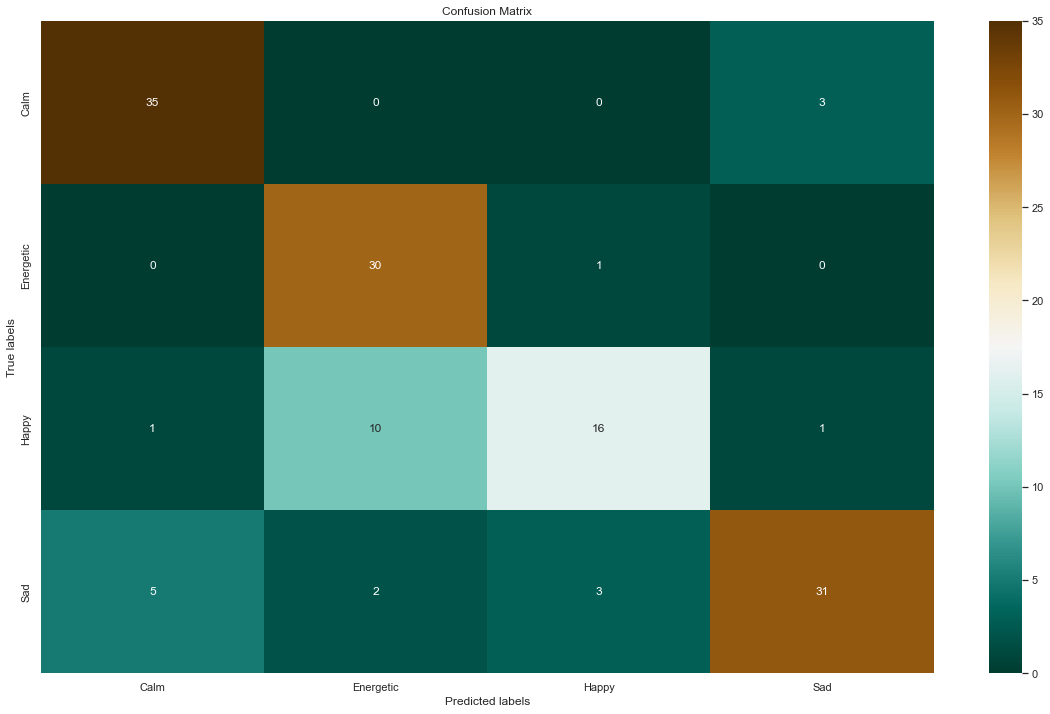

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion matrix based on the test data and our prediction
confus = confusion_matrix(Y_test, y_predict)

#plot the confusion matrix
ax = plt.subplot()
sns.heatmap(confus,annot=True,ax=ax, cmap='BrBG_r')
labels = target['mood'].tolist()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [78]:
print("Accuracy Score",accuracy_score(Y_test,y_predict))

Accuracy Score 0.8115942028985508


# Predicting a new song

In [81]:
from sklearn.pipeline import Pipeline

feature_array = np.array(df[col_features])
title = 'Chantaje (feat. Maluma)'

def predict_song_mood(title):
    runner = Pipeline([('minmaxscalar', MinMaxScaler()), ('keras', KerasClassifier(build_fn=base, epochs=300, batch_size=200, verbos=0))])
    
    # Fit
    runner.fit(feature_array, encoded_y)
    
    # Get song features
    track_string = data.loc[data['title'] == title]
    
     # Getting the features to input into the Model
    preds_features = np.array(track_string[0][7:-1]).reshape(-1,1).T
    
    

In [112]:
track_string = data.loc[data['title'] == 'Chantaje (feat. Maluma)']

In [115]:
track_string.columns[7:-1]

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [117]:
preds_features = np.array(track_string[0][7:-1]).reshape(-1,1).T

KeyError: 0